<a href="https://colab.research.google.com/github/VladislavasR/PP4/blob/main/PP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Start of the PP4

In [1]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import matplotlib as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
el_prices = pd.read_csv('electricity_prices.csv')
el_prices.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0.0,1.0,44.0,1.0,11.0,2011.0,0.0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0.0,1.0,44.0,1.0,11.0,2011.0,1.0,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0.0,1.0,44.0,1.0,11.0,2011.0,2.0,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0.0,1.0,44.0,1.0,11.0,2011.0,3.0,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0.0,1.0,44.0,1.0,11.0,2011.0,4.0,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [3]:
el_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19710 entries, 0 to 19709
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                19710 non-null  object 
 1   Holiday                 19709 non-null  object 
 2   HolidayFlag             19709 non-null  float64
 3   DayOfWeek               19709 non-null  float64
 4   WeekOfYear              19709 non-null  float64
 5   Day                     19709 non-null  float64
 6   Month                   19709 non-null  float64
 7   Year                    19709 non-null  float64
 8   PeriodOfDay             19709 non-null  float64
 9   ForecastWindProduction  19709 non-null  object 
 10  SystemLoadEA            19709 non-null  float64
 11  SMPEA                   19709 non-null  float64
 12  ORKTemperature          19709 non-null  object 
 13  ORKWindspeed            19709 non-null  object 
 14  CO2Intensity            19709 non-null

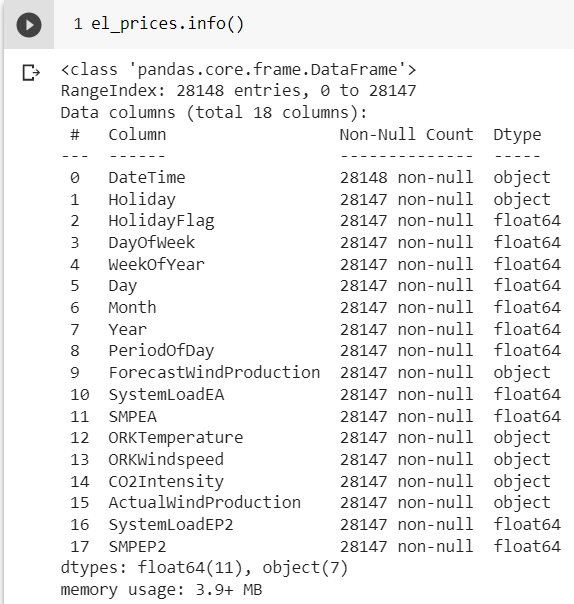

In [4]:
el_prices = el_prices.replace('?', np.NaN)

In [5]:
el_prices['DateTime']=pd.to_datetime(el_prices['DateTime'], dayfirst=True)

In [6]:
columns_to_numeric = ['ForecastWindProduction', 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity', 'ActualWindProduction']
el_prices[columns_to_numeric] = el_prices[columns_to_numeric].apply(pd.to_numeric)

In [7]:
el_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19710 entries, 0 to 19709
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                19710 non-null  datetime64[ns]
 1   Holiday                 19709 non-null  object        
 2   HolidayFlag             19709 non-null  float64       
 3   DayOfWeek               19709 non-null  float64       
 4   WeekOfYear              19709 non-null  float64       
 5   Day                     19709 non-null  float64       
 6   Month                   19709 non-null  float64       
 7   Year                    19709 non-null  float64       
 8   PeriodOfDay             19709 non-null  float64       
 9   ForecastWindProduction  19708 non-null  float64       
 10  SystemLoadEA            19709 non-null  float64       
 11  SMPEA                   19709 non-null  float64       
 12  ORKTemperature          19545 non-null  float6

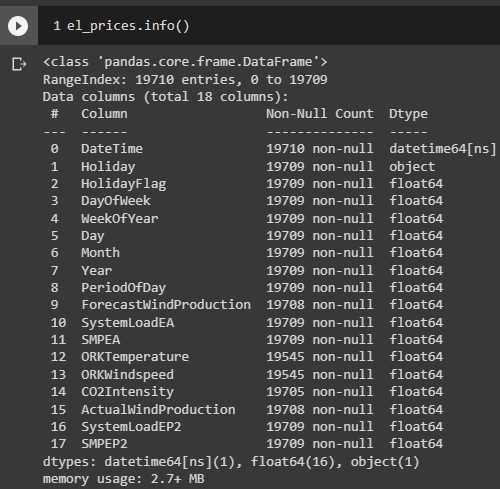

In [8]:
el_prices.isnull().sum()

DateTime                    0
Holiday                     1
HolidayFlag                 1
DayOfWeek                   1
WeekOfYear                  1
Day                         1
Month                       1
Year                        1
PeriodOfDay                 1
ForecastWindProduction      2
SystemLoadEA                1
SMPEA                       1
ORKTemperature            165
ORKWindspeed              165
CO2Intensity                5
ActualWindProduction        2
SystemLoadEP2               1
SMPEP2                      1
dtype: int64

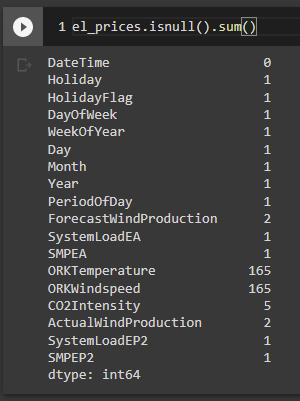

In [9]:
el_prices = el_prices.dropna()

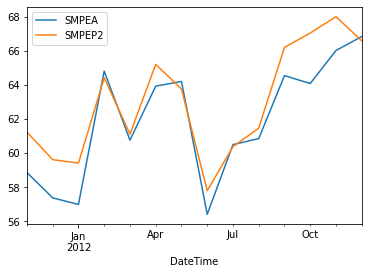

In [10]:
el_prices_plot = el_prices.set_index('DateTime')
el_prices_plot[['SMPEA','SMPEP2']].resample('M').mean().plot()

In [13]:
el_prices.Holiday.nunique()
one_hot = pd.get_dummies(el_prices['Holiday'])
one_hot.head()

,August Bank Holiday,Christmas,Christmas Eve,Easter,Easter Monday,Good Friday,Holy Saturday,June Bank Holiday,May Day,New Year's Day,New Year's Eve,None,October Bank Holiday,St Patrick's Day,St Stephen's Day
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
